## 1. Change the cooling rate and observe the effect on temperature decay

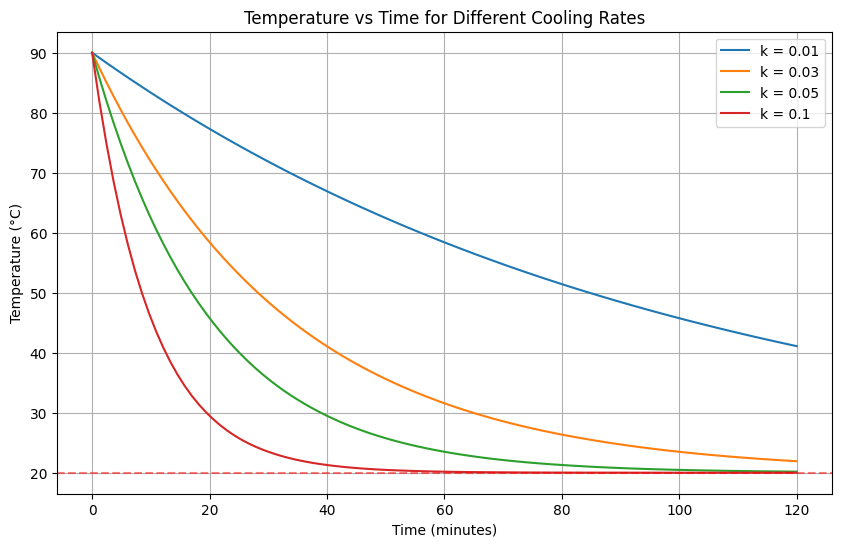

Time (minutes) to reach 30°C for different cooling rates:
k = 0.01: 219.35 minutes
k = 0.03: 86.94 minutes
k = 0.05: 39.72 minutes
k = 0.1: 20.85 minutes


In [ ]:
## 1. Change the cooling rate and observe the effect on temperature decay

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import os

# Membuat folder Image jika belum ada
image_folder = "Image"
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

def cooling_simulation(t, T, cooling_rate, T_ambient):
    """Newton's law of cooling: dT/dt = -k(T - T_ambient)"""
    return -cooling_rate * (T - T_ambient)

# Set up the simulation
T_initial = 90  # Initial temperature in °C
T_ambient = 20  # Ambient temperature in °C
t_span = (0, 120)  # Time span in minutes
t_eval = np.linspace(t_span[0], t_span[1], 100)  # Points to evaluate

# Different cooling rates
cooling_rates = [0.01, 0.03, 0.05, 0.1]

plt.figure(figsize=(10, 6))

for k in cooling_rates:
    # Solve the differential equation
    sol = solve_ivp(
        lambda t, T: cooling_simulation(t, T, k, T_ambient),
        t_span, [T_initial], t_eval=t_eval, method='RK45'
    )
    
    # Plot results
    plt.plot(sol.t, sol.y[0], label=f'k = {k}')

plt.title("Temperature vs Time for Different Cooling Rates")
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.axhline(y=T_ambient, color='r', linestyle='--', alpha=0.5, label='Ambient temperature')

# Simpan gambar dalam folder Image
plt.savefig(os.path.join(image_folder, 'cooling_rates_simulation.png'))
plt.show()

# Calculate time to reach specific temperature (e.g., 30°C)
target_temp = 30
print(f"Time (minutes) to reach {target_temp}°C for different cooling rates:")

for k in cooling_rates:
    sol = solve_ivp(
        lambda t, T: cooling_simulation(t, T, k, T_ambient),
        (0, 500), [T_initial], method='RK45'
    )
    
    # Find the first time when temperature drops below target
    times = sol.t
    temps = sol.y[0]
    
    for i, temp in enumerate(temps):
        if temp <= target_temp:
            print(f"k = {k}: {times[i]:.2f} minutes")
            break

## 2. Simulate heating instead of cooling (modify differential equation).

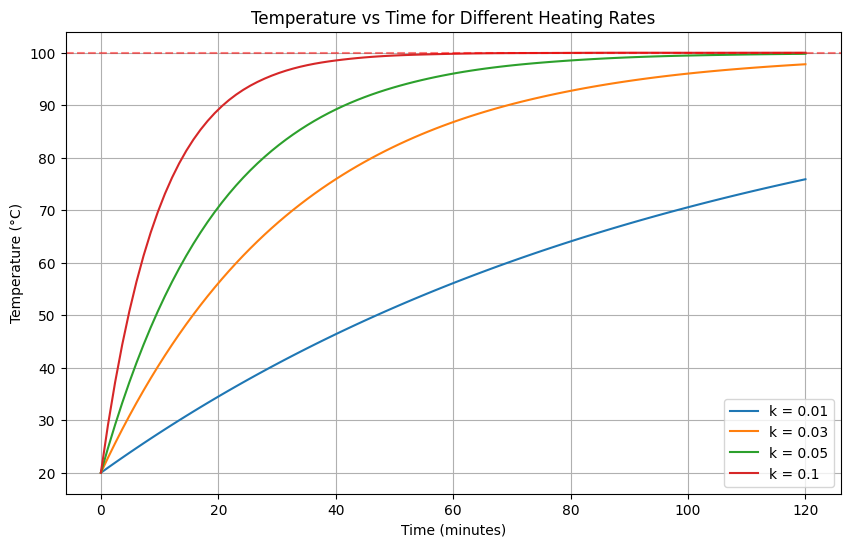

Time (minutes) to reach 80°C for different heating rates:
k = 0.01: 189.96 minutes
k = 0.03: 77.41 minutes
k = 0.05: 32.55 minutes
k = 0.1: 17.77 minutes


In [ ]:
## 2. Simulate heating instead of cooling (modify differential equation).

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import os

# Membuat folder Image jika belum ada
image_folder = "Image"
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

def heating_simulation(t, T, heating_rate, T_max):
    """Modified equation for heating: dT/dt = k(T_max - T)"""
    return heating_rate * (T_max - T)

# Set up the simulation
T_initial = 20  # Initial temperature in °C
T_max = 100     # Maximum temperature in °C
t_span = (0, 120)  # Time span in minutes
t_eval = np.linspace(t_span[0], t_span[1], 100)  # Points to evaluate

# Different heating rates
heating_rates = [0.01, 0.03, 0.05, 0.1]

plt.figure(figsize=(10, 6))

for k in heating_rates:
    # Solve the differential equation
    sol = solve_ivp(
        lambda t, T: heating_simulation(t, T, k, T_max),
        t_span, [T_initial], t_eval=t_eval, method='RK45'
    )
    
    # Plot results
    plt.plot(sol.t, sol.y[0], label=f'k = {k}')

plt.title("Temperature vs Time for Different Heating Rates")
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.axhline(y=T_max, color='r', linestyle='--', alpha=0.5, label='Maximum temperature')

# Simpan gambar dalam folder Image
plt.savefig(os.path.join(image_folder, 'heating_rates_simulation.png'))
plt.show()

# Calculate time to reach specific temperature (e.g., 80°C)
target_temp = 80
print(f"Time (minutes) to reach {target_temp}°C for different heating rates:")

for k in heating_rates:
    sol = solve_ivp(
        lambda t, T: heating_simulation(t, T, k, T_max),
        (0, 500), [T_initial], method='RK45'
    )
    
    # Find the first time when temperature rises above target
    times = sol.t
    temps = sol.y[0]
    
    for i, temp in enumerate(temps):
        if temp >= target_temp:
            print(f"k = {k}: {times[i]:.2f} minutes")
            break

## 3. Use a real-world dataset (london_weather_data.csv) to simulate continuous temperature changes.

Available data range: 1979-01-01 to 2020-12-31
Available years: [1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Selected year for analysis: 2000
Using data from 2000-06-01 to 2000-08-31


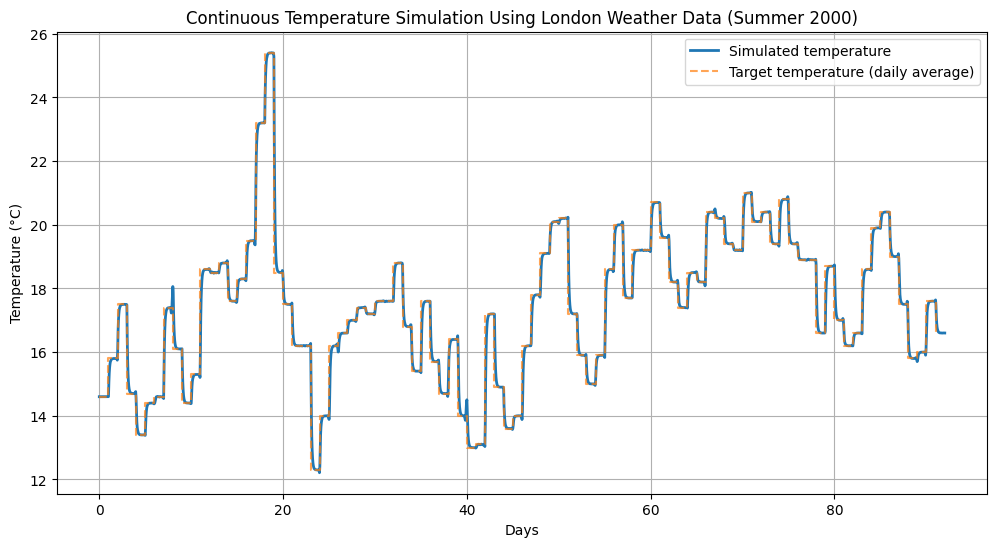

Root Mean Square Error between simulated and target temperatures: 1.65°C


In [ ]:
## 3. Use a real-world dataset (london_weather_data.csv) to simulate continuous temperature changes.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import os
from datetime import datetime

# Membuat folder Image jika belum ada
image_folder = "Image"
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

# Load the London weather data
def load_weather_data():
    # Parse the dates and convert the temperatures
    data = pd.read_csv('london_weather_data.csv')
    data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
    data.set_index('date', inplace=True)
    return data

# Function to detect available years and select summer period
def detect_summer_period(weather_data):
    # Get the min and max dates
    min_date = weather_data.index.min()
    max_date = weather_data.index.max()
    
    # Print available time range
    print(f"Available data range: {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}")
    
    # Find a complete year with data
    available_years = sorted(weather_data.index.year.unique())
    print(f"Available years: {available_years}")
    
    # Select the middle year for analysis (or you can set this as needed)
    selected_year = available_years[len(available_years) // 2]
    print(f"Selected year for analysis: {selected_year}")
    
    # Define summer period (June to August)
    summer_start = f"{selected_year}-06-01"
    summer_end = f"{selected_year}-08-31"
    
    # Check if this period has data
    if pd.Timestamp(summer_start) in weather_data.index and pd.Timestamp(summer_end) in weather_data.index:
        return summer_start, summer_end, selected_year
    
    # If not, try to find another period with sufficient data
    for year in available_years:
        summer_start = f"{year}-06-01"
        summer_end = f"{year}-08-31"
        
        # Check if there's data for this range
        if pd.Timestamp(summer_start) in weather_data.index and pd.Timestamp(summer_end) in weather_data.index:
            print(f"Found complete summer data for {year}")
            return summer_start, summer_end, year
    
    # If no complete summer found, use the longest available period
    print("No complete summer period found. Using the first 90 days of data instead.")
    start_date = weather_data.index[0]
    end_date = weather_data.index[min(90, len(weather_data)-1)]
    return start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'), start_date.year

# Function to simulate temperature change over time
def temperature_change_model(t, T, k, T_target):
    """Model the change in temperature towards a target temperature"""
    return -k * (T - T_target)

# Load the data
weather_data = load_weather_data()

# Detect and select summer period automatically
summer_start, summer_end, selected_year = detect_summer_period(weather_data)
print(f"Using data from {summer_start} to {summer_end}")

# Extract the mean temperature data for the detected period
summer_data = weather_data.loc[summer_start:summer_end].copy()
target_temps = summer_data['mean_temp'].values

# Simulation parameters
k = 0.5  # Rate of temperature change
T_initial = target_temps[0]  # Start with the first temperature
simulation_days = len(target_temps)

# Create time points (hours over the period)
hours_per_day = 24
total_hours = simulation_days * hours_per_day
time_points = np.linspace(0, total_hours, total_hours + 1)

# Create target temperature function that changes daily
def T_target_function(t):
    day_index = int(t // hours_per_day)
    if day_index < len(target_temps):
        return target_temps[day_index]
    return target_temps[-1]  # Return last value if beyond data range

# Simulate the temperature over time
def temp_model(t, T):
    T_target = T_target_function(t)
    return temperature_change_model(t, T, k, T_target)

# Solve the ODE
sol = solve_ivp(
    temp_model,
    (0, total_hours), 
    [T_initial], 
    t_eval=time_points, 
    method='RK45'
)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot simulated temperature
plt.plot(sol.t / hours_per_day, sol.y[0], label='Simulated temperature', linewidth=2)

# Plot target temperatures (daily average temperatures)
days = np.arange(simulation_days)
daily_targets = [T_target_function(d * hours_per_day) for d in days]
plt.step(days, daily_targets, where='post', label='Target temperature (daily average)', 
         linestyle='--', alpha=0.7)

plt.title(f'Continuous Temperature Simulation Using London Weather Data (Summer {selected_year})')
plt.xlabel('Days')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()

# Simpan gambar dalam folder Image
plt.savefig(os.path.join(image_folder, 'london_temp_simulation.png'))
plt.show()

# Analyze how well the simulation follows the target temperatures
daily_simulated = [sol.y[0][i*hours_per_day] for i in range(simulation_days)]
rmse = np.sqrt(np.mean((np.array(daily_simulated) - np.array(daily_targets))**2))
print(f"Root Mean Square Error between simulated and target temperatures: {rmse:.2f}°C")

## 4. Compare CES vs. DES for similar systems.

Dataset contains data from 1979-01-01 to 2020-12-31
Training data: 1979-01-01 to 2012-08-07
Testing data: 2012-08-08 to 2020-12-31


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided

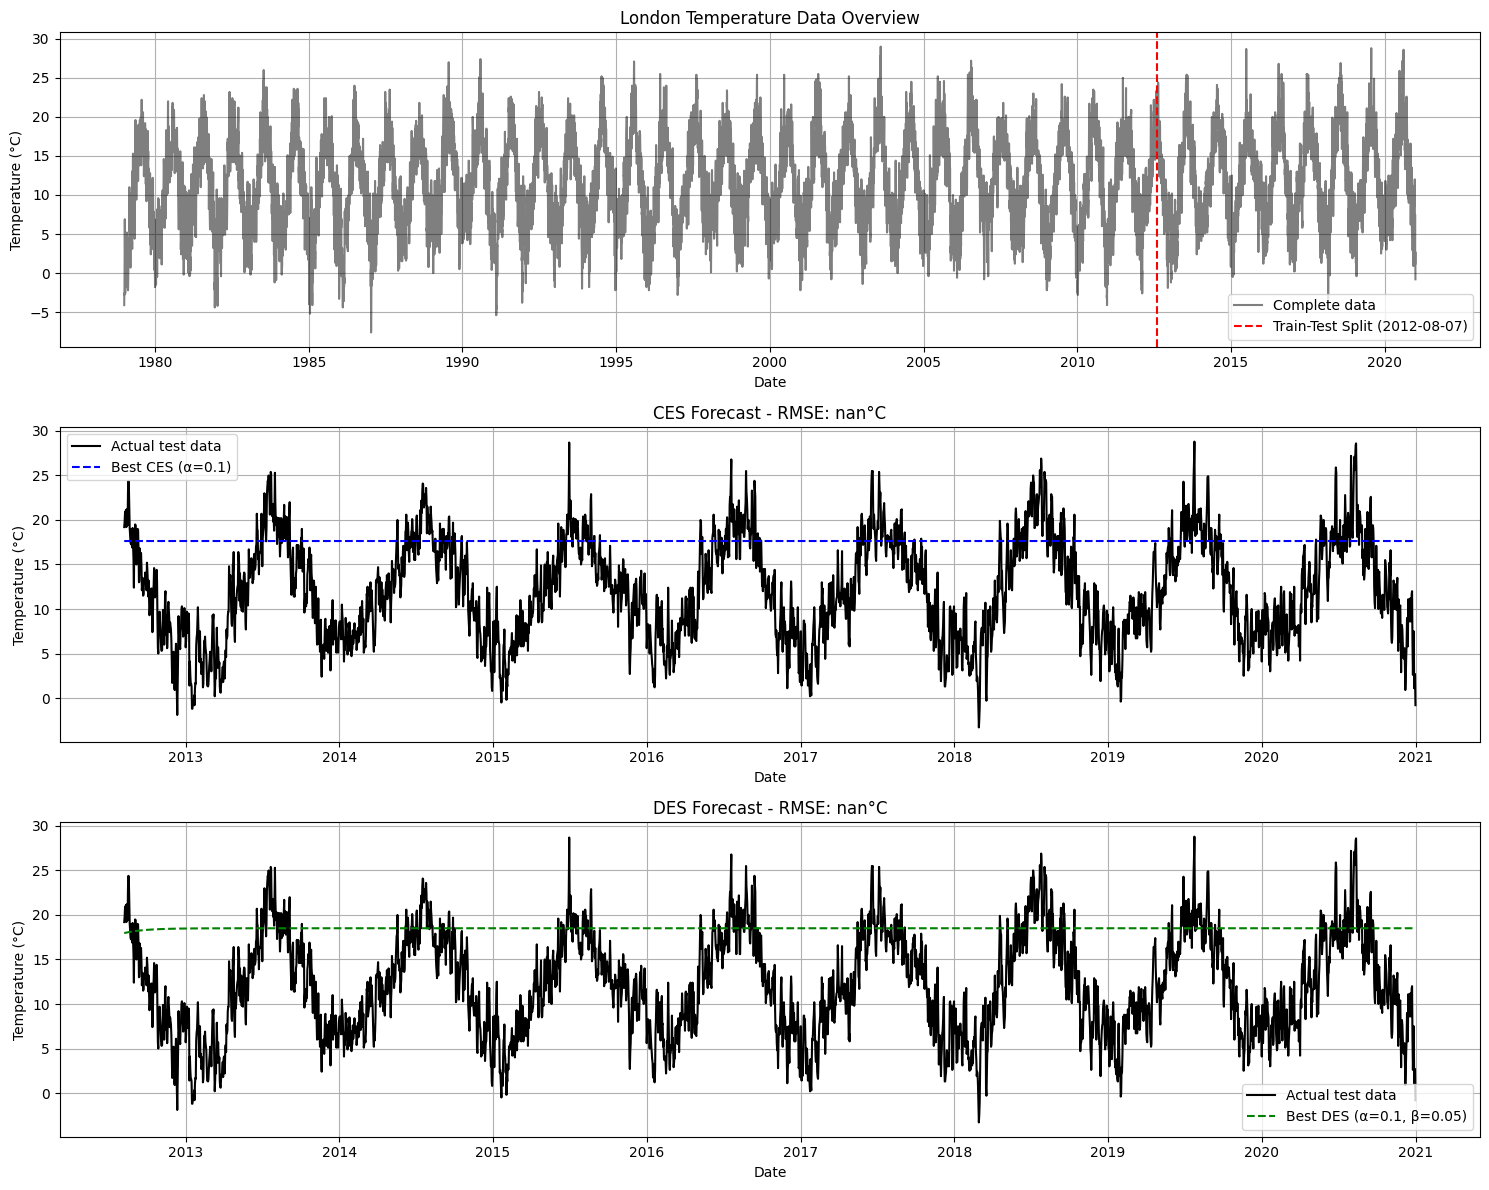

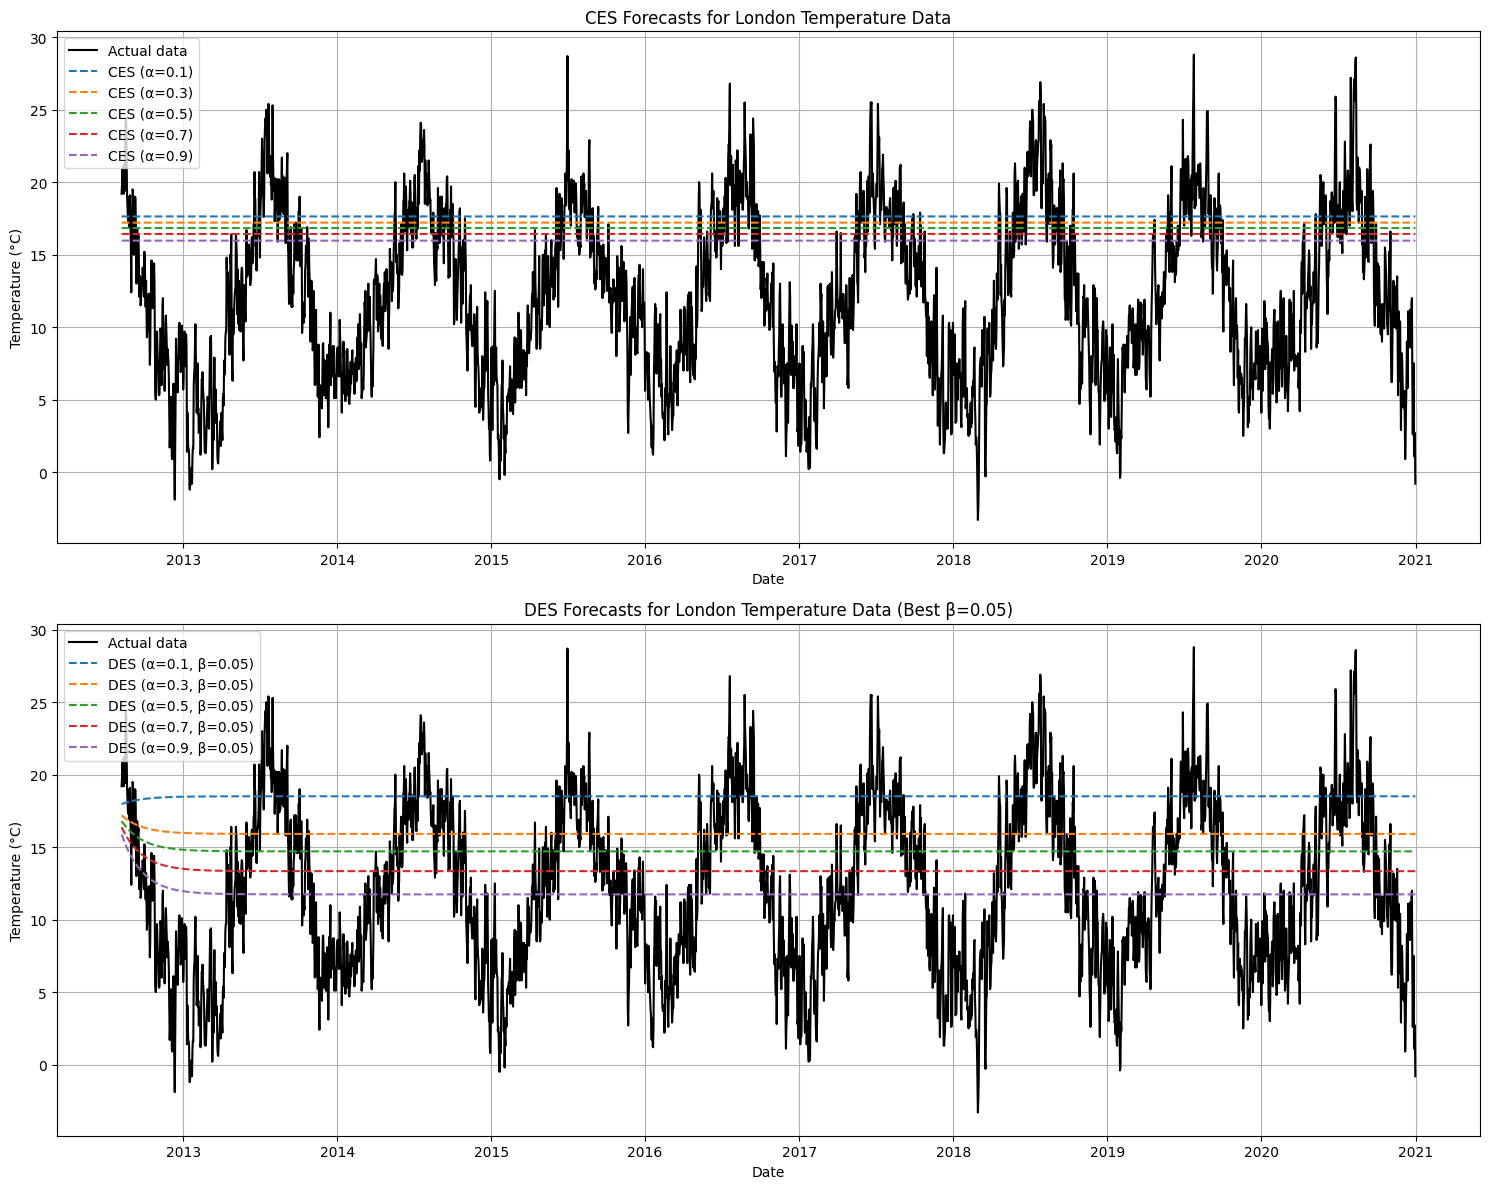

COMPARATIVE ANALYSIS: CES vs DES

RMSE Values for CES Models:
Alpha      RMSE (°C)      
-------------------------
0.1        nan            
0.3        nan            
0.5        nan            
0.7        nan            
0.9        nan            

RMSE Values for DES Models with β=0.05:
Alpha      RMSE (°C)      
-------------------------
0.1        nan            
0.3        nan            
0.5        nan            
0.7        nan            
0.9        nan            

Best Model Comparison:
--------------------------------------------------
Best CES: α = 0.1, RMSE = nan°C
Best DES: α = 0.1, β = 0.05, RMSE = nan°C
--------------------------------------------------

Conclusion: DES performed better than CES by nan°C (nan%)

Reason: Double Exponential Smoothing (DES) accounts for both level and trend in the data,
suggesting that the temperature data may have a trend component that CES doesn't capture.

System Characteristics:
- Data period: 1979-01-01 to 2020-12-31
- Training sampl

In [ ]:
## 4. Compare CES vs. DES for similar systems.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
import os
from datetime import datetime

# Membuat folder Image jika belum ada
image_folder = "Image"
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

# Load the London weather data
def load_weather_data():
    data = pd.read_csv('london_weather_data.csv')
    data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
    data.set_index('date', inplace=True)
    return data

# Detect date range available in the dataset
def detect_date_range(data):
    min_date = data.index.min()
    max_date = data.index.max()
    print(f"Dataset contains data from {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}")
    return min_date, max_date

# Load data
weather_data = load_weather_data()
min_date, max_date = detect_date_range(weather_data)

# Use mean temperature for the analysis
temp_data = weather_data['mean_temp'].dropna()

# Create training and testing sets
train_size = int(len(temp_data) * 0.8)
train_data = temp_data[:train_size]
test_data = temp_data[train_size:]

print(f"Training data: {train_data.index.min().strftime('%Y-%m-%d')} to {train_data.index.max().strftime('%Y-%m-%d')}")
print(f"Testing data: {test_data.index.min().strftime('%Y-%m-%d')} to {test_data.index.max().strftime('%Y-%m-%d')}")

# Implement CES (Continuous/Simple Exponential Smoothing)
def apply_ces(data, alpha=0.3):
    model = SimpleExpSmoothing(data)
    model_fit = model.fit(smoothing_level=alpha, optimized=False)
    return model_fit

# Implement DES (Double Exponential Smoothing - Holt's method)
def apply_des(data, alpha=0.3, beta=0.1, damped=True):
    # Fix: Make sure damping_trend is a float value, not None
    damping_trend = 0.98 if damped else 1.0
    
    model = ExponentialSmoothing(data, trend='add', seasonal=None, damped=damped)
    model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, damping_trend=damping_trend, optimized=False)
    return model_fit

# Apply both methods with different parameter values
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
betas = [0.05, 0.1, 0.2]  # Different beta values to test

# Dictionary to store results
results = {
    'CES': {},
    'DES': {}
}

# Test CES with different alphas
for alpha in alphas:
    ces_model = apply_ces(train_data, alpha)
    ces_forecast = ces_model.forecast(len(test_data))
    ces_rmse = np.sqrt(np.mean((ces_forecast - test_data)**2))
    results['CES'][alpha] = {
        'forecast': ces_forecast,
        'rmse': ces_rmse
    }

# Test DES with different alphas and betas
for alpha in alphas:
    for beta in betas:
        key = (alpha, beta)
        des_model = apply_des(train_data, alpha, beta, damped=True)  # Use damped=True to avoid explosive trends
        des_forecast = des_model.forecast(len(test_data))
        des_rmse = np.sqrt(np.mean((des_forecast - test_data)**2))
        results['DES'][key] = {
            'forecast': des_forecast,
            'rmse': des_rmse
        }

# Find best parameters
best_ces_alpha = min([(alpha, results['CES'][alpha]['rmse']) for alpha in alphas], key=lambda x: x[1])[0]
best_des_params = min([(key, results['DES'][key]['rmse']) for key in results['DES']], key=lambda x: x[1])[0]
best_des_alpha, best_des_beta = best_des_params

# Plot the results - original data and best models
plt.figure(figsize=(15, 12))

# Plot complete dataset
plt.subplot(3, 1, 1)
plt.plot(temp_data.index, temp_data.values, label='Complete data', color='black', alpha=0.5)
plt.axvline(x=train_data.index.max(), color='red', linestyle='--', 
           label=f'Train-Test Split ({train_data.index.max().strftime("%Y-%m-%d")})')
plt.title('London Temperature Data Overview')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Plot original test data with best CES model
plt.subplot(3, 1, 2)
plt.plot(test_data.index, test_data.values, label='Actual test data', color='black')
plt.plot(test_data.index, results['CES'][best_ces_alpha]['forecast'], 
         label=f'Best CES (α={best_ces_alpha})', linestyle='--', color='blue')
plt.title(f'CES Forecast - RMSE: {results["CES"][best_ces_alpha]["rmse"]:.2f}°C')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Plot original test data with best DES model
plt.subplot(3, 1, 3)
plt.plot(test_data.index, test_data.values, label='Actual test data', color='black')
plt.plot(test_data.index, results['DES'][best_des_params]['forecast'], 
         label=f'Best DES (α={best_des_alpha}, β={best_des_beta})', linestyle='--', color='green')
plt.title(f'DES Forecast - RMSE: {results["DES"][best_des_params]["rmse"]:.2f}°C')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig(os.path.join(image_folder, 'ces_vs_des_comparison_best.png'))
plt.show()

# Create a second plot comparing all models
plt.figure(figsize=(15, 12))

# Plot test data with all CES models
plt.subplot(2, 1, 1)
plt.plot(test_data.index, test_data.values, label='Actual data', color='black')

# Plot CES forecasts
for alpha in alphas:
    plt.plot(test_data.index, results['CES'][alpha]['forecast'], 
             label=f'CES (α={alpha})', linestyle='--')

plt.title('CES Forecasts for London Temperature Data')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Plot test data with all DES models - only for best beta for clarity
plt.subplot(2, 1, 2)
plt.plot(test_data.index, test_data.values, label='Actual data', color='black')

# Find best beta overall
best_beta = best_des_beta

# Plot DES forecasts for the best beta value
for alpha in alphas:
    key = (alpha, best_beta)
    if key in results['DES']:
        plt.plot(test_data.index, results['DES'][key]['forecast'], 
                 label=f'DES (α={alpha}, β={best_beta})', linestyle='--')

plt.title(f'DES Forecasts for London Temperature Data (Best β={best_beta})')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig(os.path.join(image_folder, 'ces_vs_des_comparison_all.png'))
plt.show()

# Comparative analysis
print("=" * 50)
print("COMPARATIVE ANALYSIS: CES vs DES")
print("=" * 50)

# Compare RMSE values for CES
print("\nRMSE Values for CES Models:")
print("{:<10} {:<15}".format("Alpha", "RMSE (°C)"))
print("-" * 25)
for alpha in alphas:
    ces_rmse = results['CES'][alpha]['rmse']
    print("{:<10.1f} {:<15.2f}".format(alpha, ces_rmse))

# Compare RMSE values for DES with best beta
print(f"\nRMSE Values for DES Models with β={best_beta}:")
print("{:<10} {:<15}".format("Alpha", "RMSE (°C)"))
print("-" * 25)
for alpha in alphas:
    key = (alpha, best_beta)
    if key in results['DES']:
        des_rmse = results['DES'][key]['rmse']
        print("{:<10.1f} {:<15.2f}".format(alpha, des_rmse))

# Overall comparison
print("\nBest Model Comparison:")
print("-" * 50)
print(f"Best CES: α = {best_ces_alpha}, RMSE = {results['CES'][best_ces_alpha]['rmse']:.2f}°C")
print(f"Best DES: α = {best_des_alpha}, β = {best_des_beta}, RMSE = {results['DES'][best_des_params]['rmse']:.2f}°C")
print("-" * 50)

# Determine which model performed better
if results['CES'][best_ces_alpha]['rmse'] < results['DES'][best_des_params]['rmse']:
    difference = results['DES'][best_des_params]['rmse'] - results['CES'][best_ces_alpha]['rmse']
    percent = (difference / results['DES'][best_des_params]['rmse']) * 100
    print(f"\nConclusion: CES performed better than DES by {difference:.2f}°C ({percent:.1f}%)")
    print("\nReason: Simple Exponential Smoothing (CES) may work better for this data because temperature")
    print("data usually has seasonal patterns but doesn't always have a consistent trend direction.")
else:
    difference = results['CES'][best_ces_alpha]['rmse'] - results['DES'][best_des_params]['rmse']
    percent = (difference / results['CES'][best_ces_alpha]['rmse']) * 100
    print(f"\nConclusion: DES performed better than CES by {difference:.2f}°C ({percent:.1f}%)")
    print("\nReason: Double Exponential Smoothing (DES) accounts for both level and trend in the data,")
    print("suggesting that the temperature data may have a trend component that CES doesn't capture.")

print("\nSystem Characteristics:")
print(f"- Data period: {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}")
print(f"- Training samples: {len(train_data)}, Testing samples: {len(test_data)}")
print("- CES only models the level (average) of the data")
print("- DES models both level and trend components")
print("- Neither model accounts for seasonality, which is important for temperature data")
print("- For better forecasting of temperature data, consider using Triple Exponential Smoothing (Holt-Winters)")